In [13]:
import pandas as pd
import re
import numpy as np
import datetime as dt

df = pd.read_csv('serie-storiche-ecommerce.csv', sep = ',', dtype = {'settore': str, 'data': str, 'totale': str})
df = df.reset_index()

#costruiamo ed impostiamo un nuovo indice
index_list = []
for row in range(len(df)):
  index_list.append(row)
df['new_index'] = index_list
df = df.set_index('new_index')
df.head()

,index,data,totale,settore
new_index,,,,
0,2013-02-01,'815,97',Calcio
1,2013-02-21,'4775,75',Fitness
2,2013-04-01,'4775,75',Fitness
3,2013-04-06,'1962,15',Casual
4,2013-07-09,'1809,87',Basket


### Controlliamo i dati a disposizione

#### Avendo usato come separatore colonna la virgola, gli importi sono stati divisi nelle due colonne 'data' e 'totale'. 

In [14]:
df[df['settore'].isnull()]
## I dati mancanti di 'settore' si trovano nella colonna 'totale'
# df[df['totale'].isnull()]
# df[df['data'].isnull()]
# df[df['index'].isnull()]

,index,data,totale,settore
new_index,,,,
204,2014-03-01,4880,Calcio,NaN
282,2014-03-13,4451,Running,NaN
354,2014-03-25,10055,Casual,NaN
510,2014-04-15,14559,Running,NaN
715,2014-05-16,9340,Casual,NaN
...,...,...,...,...
24301,2021-12-12,17381,Pesca,NaN
24385,2021-12-21,2729,Buoni / acconti,NaN
24542,2022-01-12,2729,Buoni / acconti,NaN


### Preprocessing

#### Rimuoviamo le virgolette all'inzio di ogni valore in 'data' e alla fine di 'totale'.
#### Sostituiamo i valori mancanti di 'settore' con i valori che si trovano in 'totale'. 

In [15]:
for el in range(len(df)):
    df['data'][el] = df['data'][el].strip('\'')
    df['totale'][el] = df['totale'][el].strip('\'')
    if df['settore'][el] is np.nan:
        df['settore'][el] = df['totale'][el]
        df['totale'][el] = str(0)
    
df[df['settore'].isnull()]
df[df['totale'] == '0']

,index,data,totale,settore
new_index,,,,
204,2014-03-01,4880,0,Calcio
282,2014-03-13,4451,0,Running
354,2014-03-25,10055,0,Casual
510,2014-04-15,14559,0,Running
715,2014-05-16,9340,0,Casual
...,...,...,...,...
24301,2021-12-12,17381,0,Pesca
24385,2021-12-21,2729,0,Buoni / acconti
24542,2022-01-12,2729,0,Buoni / acconti


#### Uniamo i valori di 'data' e 'totale' nella colonna totale e trasformiamo in float

In [16]:
df['totale'] = df['data'] + '.' + df['totale']
df['totale'] = df['totale'].astype(float)
df['data'] = df['index']
del[df['index']]
# Cambiamo il formato 'data'
df['data'] = pd.to_datetime(df['data'])
df

,data,totale,settore
new_index,,,
0,2013-02-01,815.97,Calcio
1,2013-02-21,4775.75,Fitness
2,2013-04-01,4775.75,Fitness
3,2013-04-06,1962.15,Casual
4,2013-07-09,1809.87,Basket
...,...,...,...
25256,2022-04-06,513.87,Sci
25257,2022-04-07,6076.12,Casual
25258,2022-04-07,597.65,Fitness


In [17]:
df[df['data'].isnull()]
df[df['totale'].isnull()]
df[df['settore'].isnull()]

,data,totale,settore
new_index,,,


#### Dividiamo 'data' in Anno, Mese, Giorno. (Comodo per le visualizzazioni)

In [18]:
df['Anno'] = df['data'].dt.year
df['Mese'] = df['data'].dt.month
df['Giorno'] = df['data'].dt.day

In [19]:
def month_rename():
    mesi = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
    for x in range(len(df)):
        df['Mese'][x] = mesi[int(df['Mese'][x])-1]
    return(df['Mese'])
month_rename()

<ipython-input-19-501ee865270b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mese'][x] = mesi[int(df['Mese'][x])-1]
C:\Users\Tommi\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


new_index
0        Febbraio
1        Febbraio
2          Aprile
3          Aprile
4          Luglio
           ...   
25256      Aprile
25257      Aprile
25258      Aprile
25259      Aprile
25260      Aprile
Name: Mese, Length: 25261, dtype: object

In [20]:
df.to_csv('serie-storiche-ecommerce-pulito.csv')

## Visualizzazioni esplorative

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Consideriamo le frequenze: annuali, mensili, decadali, settimanli, giornaliere

In [11]:
anni_fr = df.groupby('Anno', as_index = False).count()[['Anno', 'Giorno']].rename(columns = {'Giorno': 'Freq'})
# mesi_fr = df.groupby(['Anno', 'Mese'], as_index = False).count()[['Anno', 'Mese', 'Giorno']].rename(columns={'Giorno': 'Freq'}) # 9 anni: dal 2013 al 2022
# mesi_fr

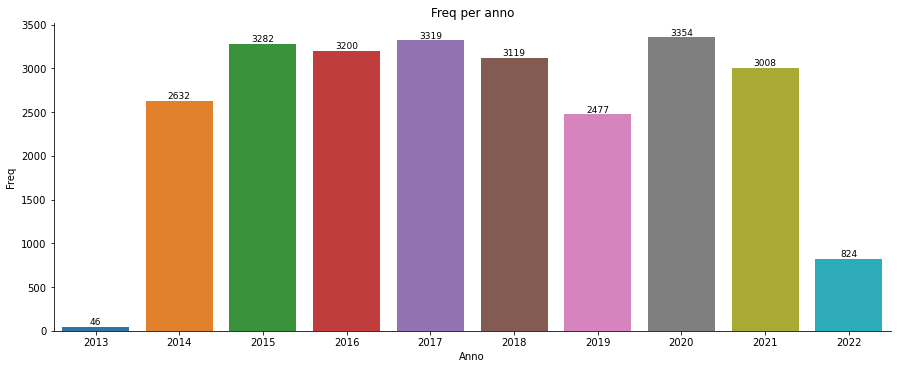

In [12]:
f, ax1 = plt.subplots(figsize = (15,5.667))#nrows = 1, ncols = len(anni_fr), sharey = True, figsize = (15,5.667))

#Figura 1 (Domestic Violence in simple assault e agg_assault)
sns.barplot(x = anni_fr['Anno'].to_list(),y= anni_fr['Freq'].to_list(), ax = ax1)
ax1.set_xlabel('Anno')
ax1.set_ylabel('Freq ')
ax1.set_title("Freq per anno")

for p in ax1.patches:
    ax1.text(p.get_x()+ p.get_width()/2.,p.get_height(), '%d' % int(p.get_height()), 
            fontsize=9, color='black', ha='center', va='bottom') 
    
sns.despine()